In [1]:
import pandas as pd
import numpy as np

# 14.1 USA.gov Data from Bitly

In [2]:
path = 'Datasets/Wesm/usa_gov.txt'

In [3]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json

In [5]:
records = [json.loads(line) for line in open(path)]

In [6]:
records[0] # retourner un Dict

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

## Counting Time zones in Pure Python

In [7]:
#extraire les time zones du json en python buit-in

In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [9]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [10]:
#skip

## Counting Time zones in Pandas

In [11]:
#en Pandas

In [12]:
frame = pd.DataFrame(records)

In [13]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 306.0+ KB


In [14]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [15]:
# compter les 'tz'
tz_counts = frame['tz'].value_counts()

In [16]:
tz_counts.head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [17]:
""" On nettoie un peu les données pour les visualizer"""

' On nettoie un peu les données pour les visualizer'

In [18]:
clean_tz = frame['tz'].fillna('Missing') # on remplace les NaN par 'missing'

In [19]:
clean_tz[clean_tz == ''] = 'Unknown' # on remplace les vides par 'Unknown

In [20]:
tz_counts = clean_tz.value_counts()

In [21]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [22]:
# Graphe avec seaborn
import seaborn as sns

In [23]:
%matplotlib inline

In [24]:
subset = tz_counts[:10]

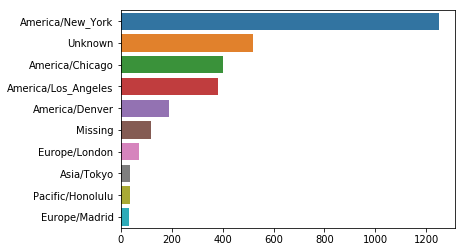

In [25]:
sns.barplot(x=subset.values,y=subset.index)

In [26]:
#le champ 'a' contient des infos pour le raccourcissement d'adresse
frame['a'][1]

'GoogleMaps/RochesterNY'

In [27]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [28]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [29]:
""" décomposer les time zones en pro windows et autres """

' décomposer les time zones en pro windows et autres '

In [30]:
cframe = frame[frame.a.notnull()] #on exclu les données manquantes

In [31]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows','Not Windows')

c:\users\marwane\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [33]:
#afficher les données par leur time zone
by_tz_os = cframe.groupby(['tz','os'])

In [34]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [35]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [36]:
indexer = agg_counts.sum(1).argsort()

In [37]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [38]:
#renvoyer les 1 pluis grandes valeurs
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [39]:
""" préparer les données pour le graphe"""

' préparer les données pour le graphe'

In [40]:
count_subset = agg_counts.take(indexer[-10:])

In [41]:
count_subset = count_subset.unstack()

In [42]:
count_subset.name = 'total'

In [43]:
count_subset = count_subset.reset_index()

In [44]:
count_subset[10:]

,os,tz,total
10,Windows,America/Sao_Paulo,20.0
11,Windows,Europe/Madrid,19.0
12,Windows,Pacific/Honolulu,36.0
13,Windows,Asia/Tokyo,35.0
14,Windows,Europe/London,31.0
15,Windows,America/Denver,59.0
16,Windows,America/Los_Angeles,252.0
17,Windows,America/Chicago,285.0
18,Windows,,276.0
19,Windows,America/New_York,912.0


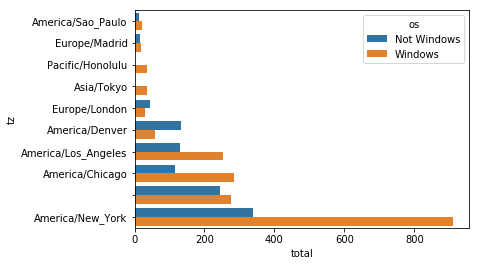

In [45]:
sns.barplot(x='total',y='tz',hue='os',data=count_subset)

In [46]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

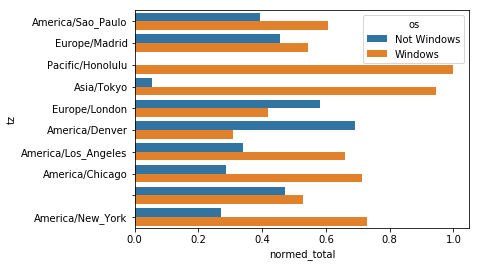

In [47]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)